In [5]:
import numpy as np
import matplotlib .pyplot as plt
from scipy.stats import multivariate_normal as smn
from jax.random import multivariate_normal as jmn
from jax import random
import numpyro
import numpyro.distributions as dist

In [6]:
def RBF(t,tau):
    Dt = t - np.array([t]).T
    K=np.exp(-(Dt)**2/2/(tau**2))
    return K

def Matern32(t,tau):
    Dt = t - np.array([t]).T
    fac=np.sqrt(3.0)*np.abs(Dt)/tau
    K=(1.0+fac)*np.exp(-fac)
    return K

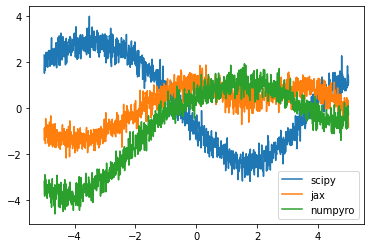

In [28]:
key = random.PRNGKey(4)
N = 1200
t = np.linspace(-5,5,N)
ave = np.zeros(N)
tau = 1.5
cov = RBF(t,tau)+0.1*np.eye(N)
#cov = Matern32(t,tau)

#scipy
ds = smn(mean=ave ,cov=cov , allow_singular =True).rvs(1).T
#jax
dj=jmn(key,ave,cov)
#numpyro
mn=dist.MultivariateNormal(loc=ave, covariance_matrix=cov)
dn = numpyro.sample('a',mn,rng_key=random.PRNGKey(20))

plt.plot(t,ds,label="scipy") 
plt.plot(t,dj,label="jax")
plt.plot(t,dn,label="numpyro")
plt.legend()

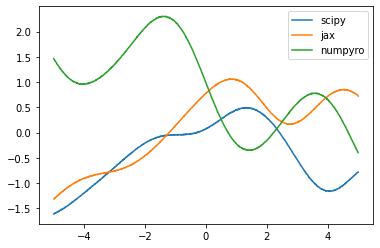

In [35]:
tiny=1.e-5

key = random.PRNGKey(4)
N = 1200
t = np.linspace(-5,5,N)
ave = np.zeros(N)
tau = 1.5
cov = RBF(t,tau)+tiny*np.eye(N)
#cov = Matern32(t,tau)

#scipy
ds = smn(mean=ave ,cov=cov , allow_singular =True).rvs(1).T
#jax
dj=jmn(key,ave,cov)
#numpyro
mn=dist.MultivariateNormal(loc=ave, covariance_matrix=cov)
dn = numpyro.sample('a',mn,rng_key=random.PRNGKey(50))

plt.plot(t,ds,label="scipy") 
plt.plot(t,dj,label="jax")
plt.plot(t,dn,label="numpyro")
plt.legend()

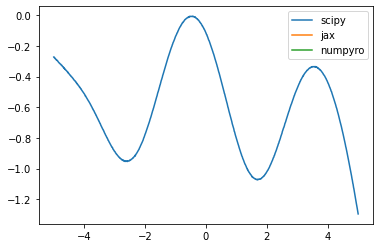

In [36]:
tiny=1.e-6

key = random.PRNGKey(4)
N = 1200
t = np.linspace(-5,5,N)
ave = np.zeros(N)
tau = 1.5
cov = RBF(t,tau)+tiny*np.eye(N)
#cov = Matern32(t,tau)

#scipy
ds = smn(mean=ave ,cov=cov , allow_singular =True).rvs(1).T
#jax
dj=jmn(key,ave,cov)
#numpyro
mn=dist.MultivariateNormal(loc=ave, covariance_matrix=cov)
dn = numpyro.sample('a',mn,rng_key=random.PRNGKey(50))

plt.plot(t,ds,label="scipy") 
plt.plot(t,dj,label="jax")
plt.plot(t,dn,label="numpyro")
plt.legend()

In [38]:
from jax.config import config
config.update('jax_enable_x64', True)

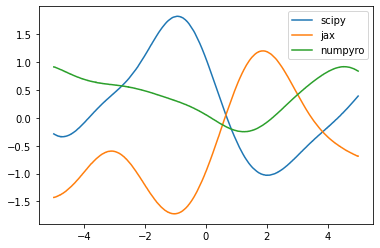

In [39]:
tiny=1.e-6

key = random.PRNGKey(4)
N = 1200
t = np.linspace(-5,5,N)
ave = np.zeros(N)
tau = 1.5
cov = RBF(t,tau)+tiny*np.eye(N)
#cov = Matern32(t,tau)

#scipy
ds = smn(mean=ave ,cov=cov , allow_singular =True).rvs(1).T
#jax
dj=jmn(key,ave,cov)
#numpyro
mn=dist.MultivariateNormal(loc=ave, covariance_matrix=cov)
dn = numpyro.sample('a',mn,rng_key=random.PRNGKey(50))

plt.plot(t,ds,label="scipy") 
plt.plot(t,dj,label="jax")
plt.plot(t,dn,label="numpyro")
plt.legend()